# USD-MNT Machine Learning Forecast - EDA

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('C:\\Users\\rober\\.matplotlib\\mpl_configdir\\stylelib\\mds.mplstyle')

import seaborn as sns

In [130]:
df = pd.read_csv('Data/Modified Data/data.csv', thousands=',')

In [131]:
df = df.set_index('Date')

In [132]:
df.head()

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,financial,errors,export,imports,balance,government_balance
Date,,,,,,,,,,,,,,,,
2008-01-31,1171.77,2.0,2307.0,551.9,1755.1,338.5,17.3,13.9,-63.3,18.6,242.7,-147.4,216.5,199.0,17.6,38429.40
2008-02-29,1171.82,2.7,2417.2,549.2,1868.0,310.0,22.1,16.3,-63.3,18.6,242.7,-147.4,433.4,376.1,57.3,55273.47
2008-03-31,1168.17,3.4,2454.8,577.7,1877.0,328.5,20.8,13.8,-63.3,18.6,242.7,-147.4,579.8,599.3,-19.5,57348.37
2008-04-30,1164.94,5.7,2466.3,583.7,1882.6,344.1,21.7,13.9,-130.6,20.1,282.8,-161.4,771.1,864.6,-93.5,48746.80
2008-05-31,1161.37,4.3,2516.2,620.6,1895.6,373.6,18.4,17.1,-130.6,20.1,282.8,-161.4,996.2,1149.6,-153.4,7603.11


In [133]:
df.dtypes

USD                   float64
cpi                   float64
m2                    float64
m1                    float64
quasi                 float64
circulation           float64
domestic              float64
foreign               float64
current               float64
capital               float64
financial             float64
errors                float64
export                float64
imports               float64
balance               float64
government_balance    float64
dtype: object

### Description of features
We have 15 features that we will be using to predict our exchange rate. A brief description of each is below:

- CPI - consumer price index. This is the change in CPI from the previous month in percent.
- m2 money supply
- m1 money supply
- quasi money: is a term used in economics to describe highly liquid assets which are not cash but can easily be converted into cash (from wikipedia)
- circulation: money in circulation
- domestic: interest rates on loans made in Mongolian Tugrik
- foreign: interest rates on loans made in foreign currency
- current: the current account from the balance of payments
- capital: the capital account from the balance of payments
- financial: the financial account from the balance of payments
- errors: errors and omissions from the balance of payments
- export: total value of exports from Mongolia
- imports: total value of imports to Mongolia
- balance: the balance of exports and imports in Mongolia
- government_balance: monetary balance of the government account. 

## Visualize Features and Relationships
As all of our features are numeric, we have little work to do converting them. This also allows us to compare our features very easily. One issue with our data is that there are a few empty values at the end of our dataframe. We can easily fill those for now so we can make our visualizations.

In [134]:
df = df.fillna(value=0)

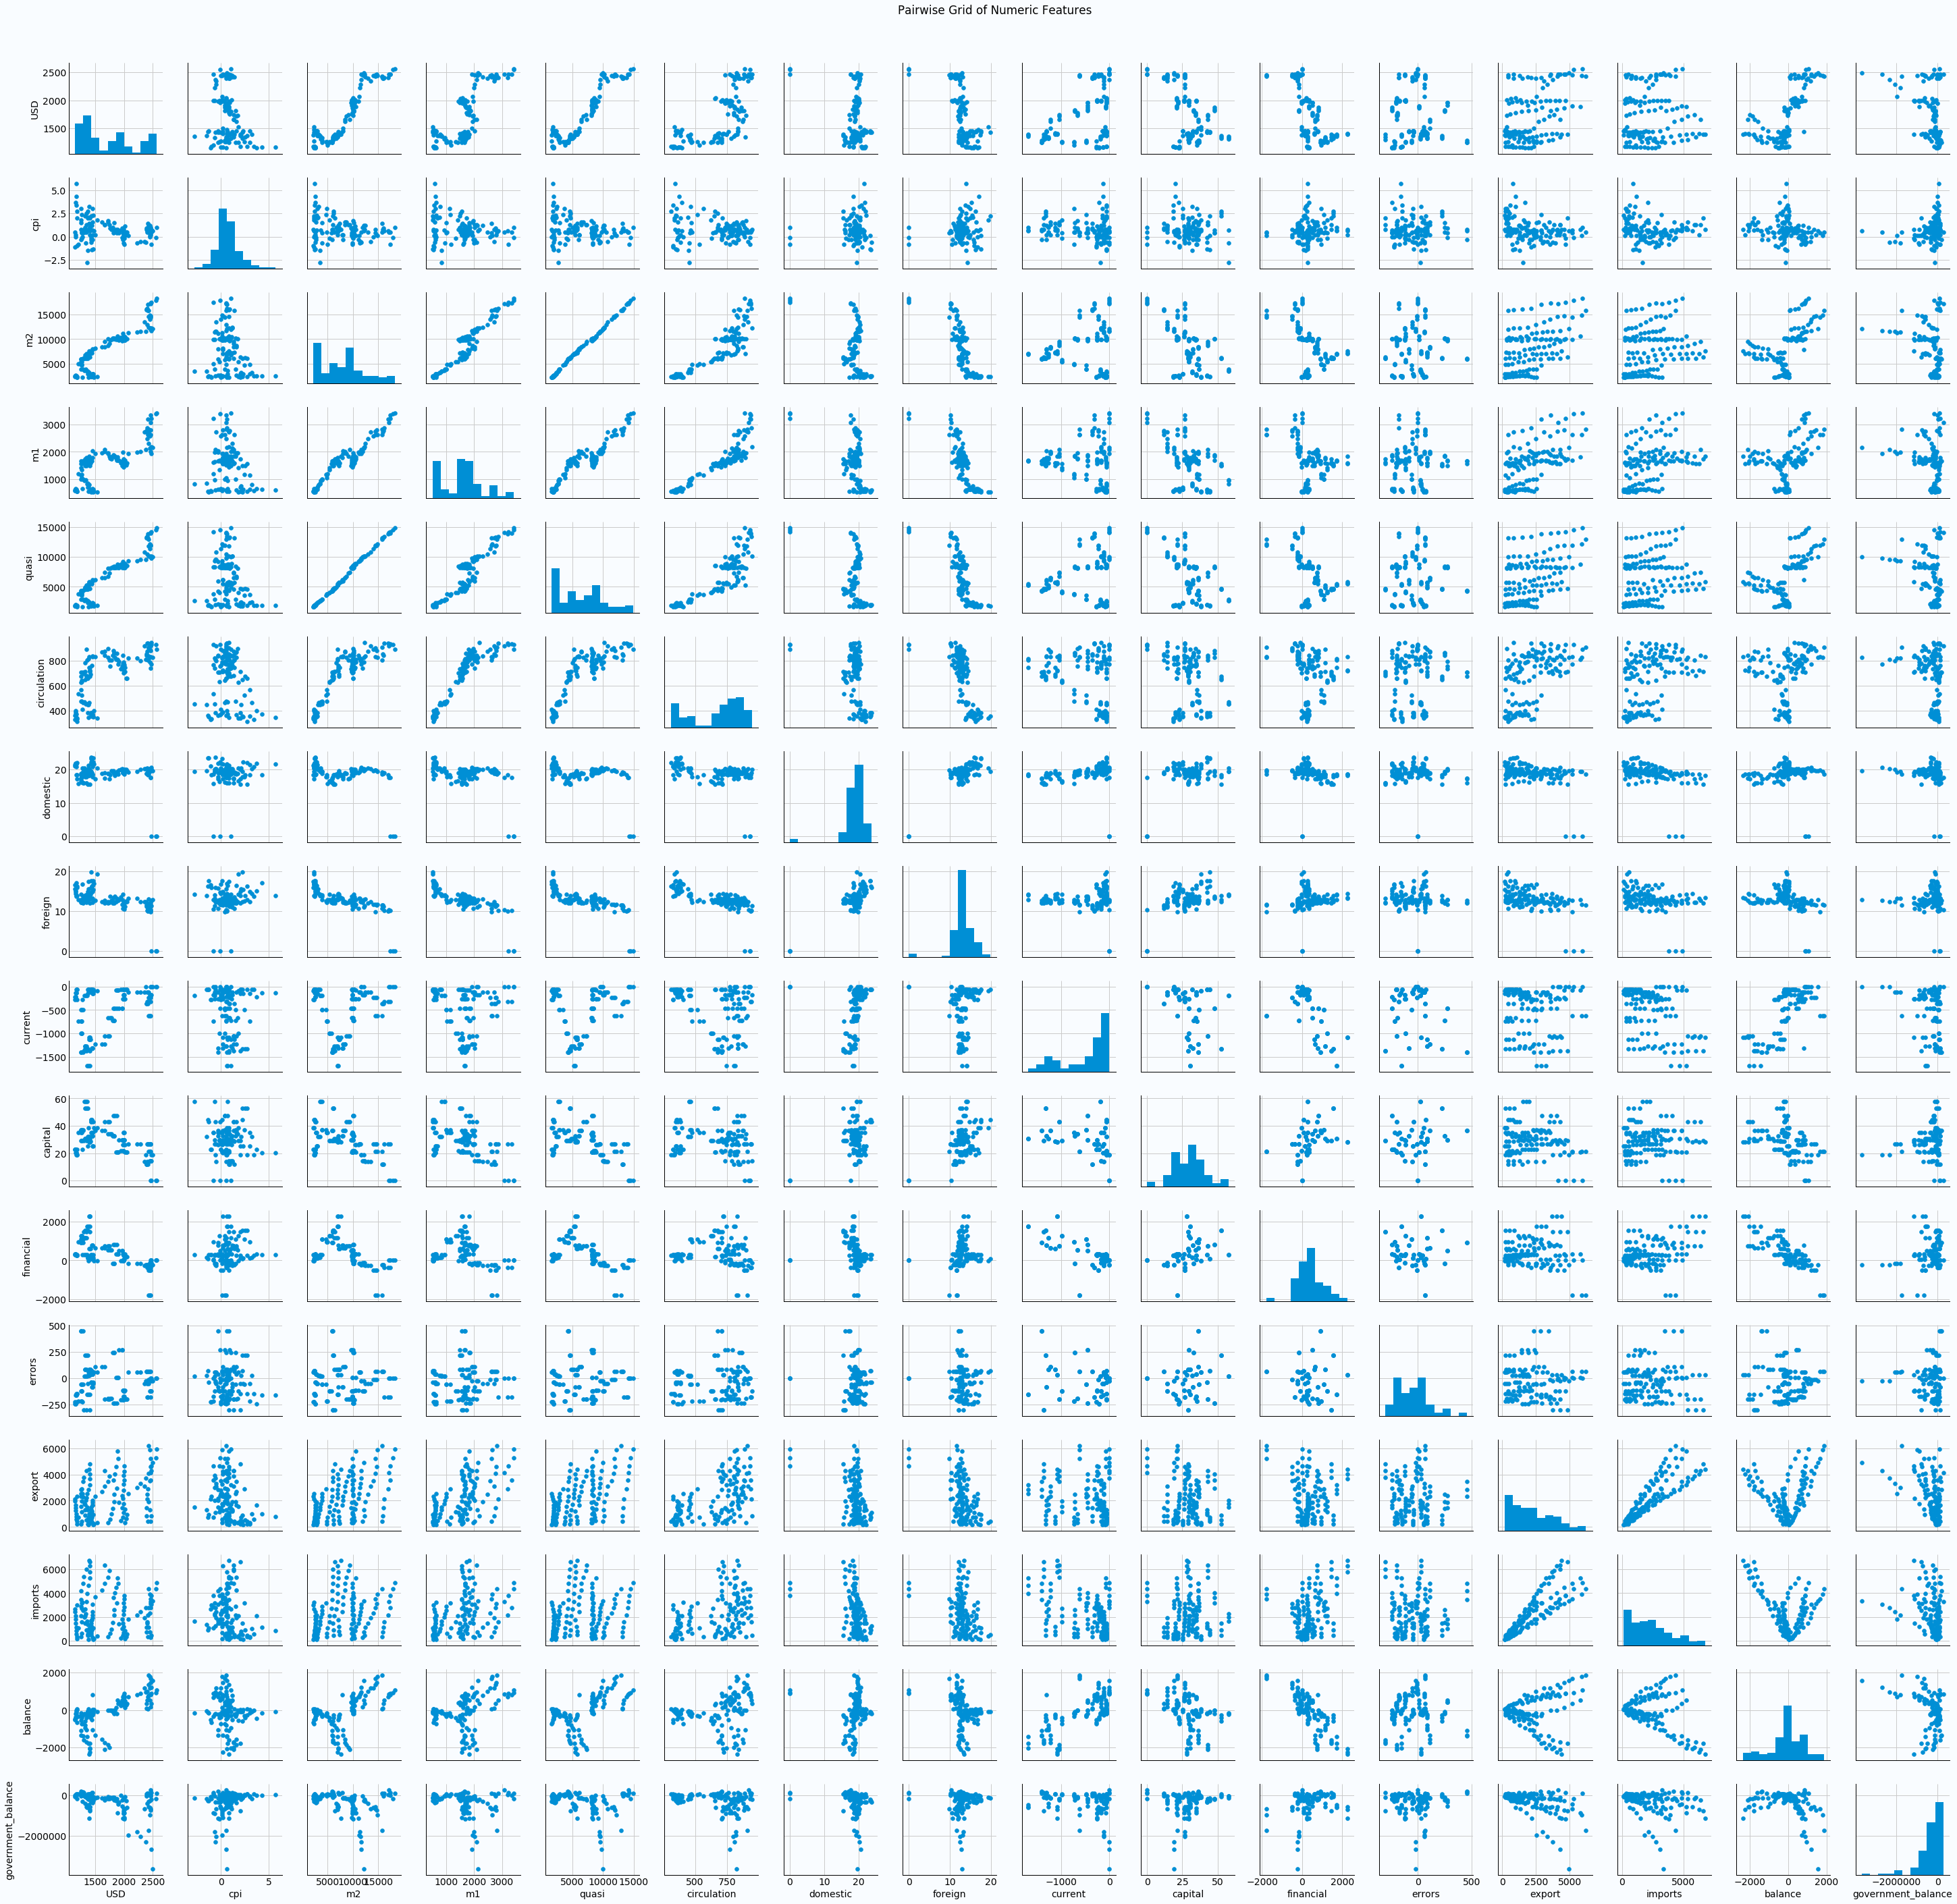

In [135]:
# Pair grid of key variables.
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

Text(0.5,1,'Correlation Heatmap of Numeric Features')

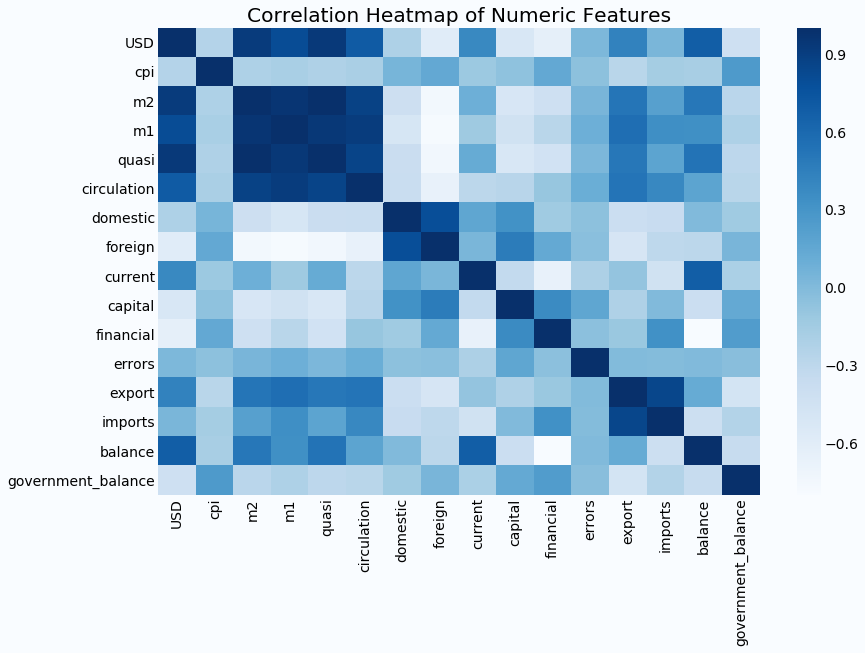

In [136]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

Use the convenience function below we can plot two of our features over time. This can give us a visual way to understand how these variables correlate outside of a correlation function. 

In [137]:
def plot_timeseries(df, y1, y2):
    fig, ax = plt.subplots()
    ax.plot(df.index, y1)
    ax2 = ax.twinx() 
    ax2.plot(df.index, y2)
    ax.set_xlabel('Date')

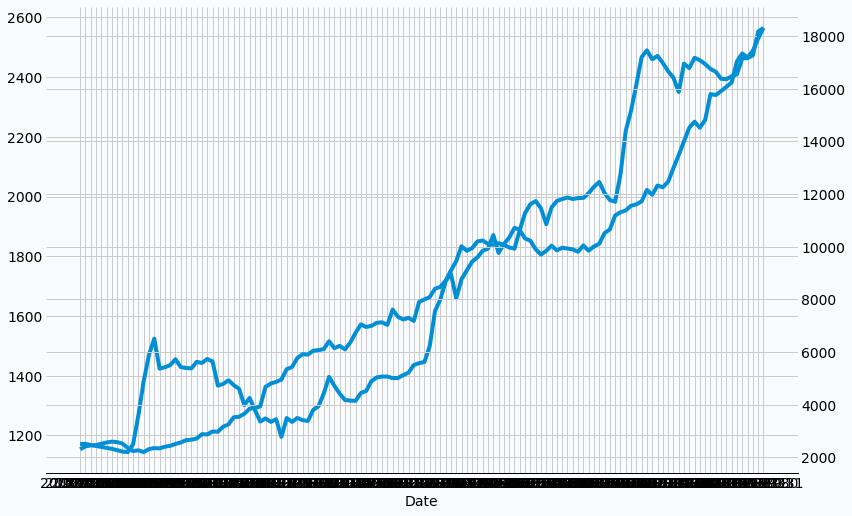

In [138]:
plot_timeseries(df, df.USD, df.m2)

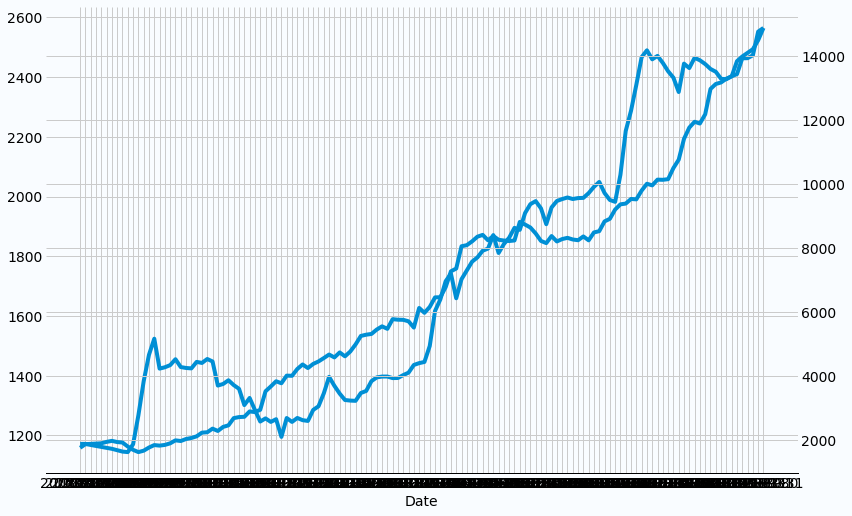

In [139]:
plot_timeseries(df, df.USD, df.quasi)

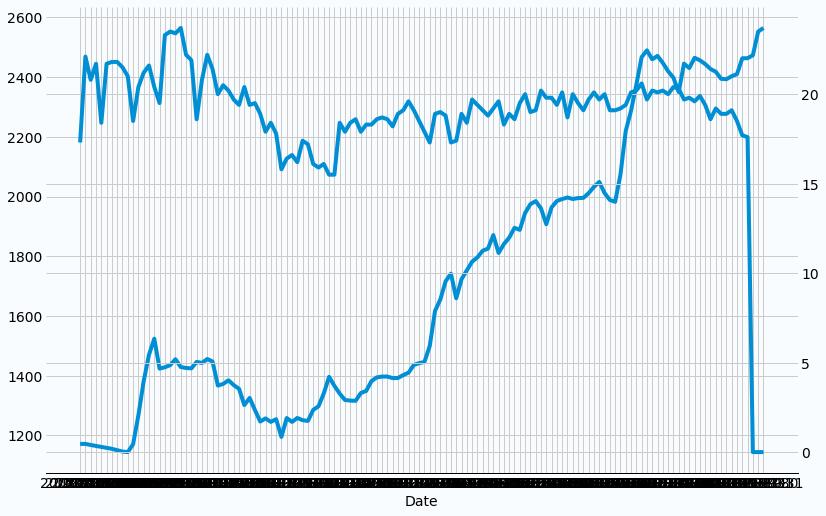

In [140]:
plot_timeseries(df, df.USD, df.domestic)

## Create lag and future values for forecasting.

In [141]:
df.head(3)

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,financial,errors,export,imports,balance,government_balance
Date,,,,,,,,,,,,,,,,
2008-01-31,1171.77,2.0,2307.0,551.9,1755.1,338.5,17.3,13.9,-63.3,18.6,242.7,-147.4,216.5,199.0,17.6,38429.40
2008-02-29,1171.82,2.7,2417.2,549.2,1868.0,310.0,22.1,16.3,-63.3,18.6,242.7,-147.4,433.4,376.1,57.3,55273.47
2008-03-31,1168.17,3.4,2454.8,577.7,1877.0,328.5,20.8,13.8,-63.3,18.6,242.7,-147.4,579.8,599.3,-19.5,57348.37


In [142]:
df.tail(3)

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,financial,errors,export,imports,balance,government_balance
Date,,,,,,,,,,,,,,,,
2018-08-31,2472.99,-0.8,17440.8,3222.8,14217.9,927.5,0.0,0.0,0.0,0.0,0.0,0.0,4671.2,3802.0,869.2,119495.8
2018-09-30,2552.13,-0.1,17911.8,3412.7,14499.1,929.1,0.0,0.0,0.0,0.0,0.0,0.0,5282.8,4351.1,931.7,-169137.8
2018-10-31,2564.44,1.0,18311.5,3428.6,14882.9,887.8,0.0,0.0,0.0,0.0,0.0,0.0,5944.8,4875.6,1069.2,100215.8


First we will create our future values. We will fill in the future 6 months as our y variables. These are what we will be trying to predict. 

In [143]:
df['y1'] = df.USD.shift(-1)
df['y2'] = df.USD.shift(-2)
df['y3'] = df.USD.shift(-3)
df['y4'] = df.USD.shift(-4)
df['y5'] = df.USD.shift(-5)
df['y6'] = df.USD.shift(-6)

In [144]:
df.head()

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,...,export,imports,balance,government_balance,y1,y2,y3,y4,y5,y6
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,1171.77,2.0,2307.0,551.9,1755.1,338.5,17.3,13.9,-63.3,18.6,...,216.5,199.0,17.6,38429.40,1171.82,1168.17,1164.94,1161.37,1158.12,1155.35
2008-02-29,1171.82,2.7,2417.2,549.2,1868.0,310.0,22.1,16.3,-63.3,18.6,...,433.4,376.1,57.3,55273.47,1168.17,1164.94,1161.37,1158.12,1155.35,1150.91
2008-03-31,1168.17,3.4,2454.8,577.7,1877.0,328.5,20.8,13.8,-63.3,18.6,...,579.8,599.3,-19.5,57348.37,1164.94,1161.37,1158.12,1155.35,1150.91,1146.09
2008-04-30,1164.94,5.7,2466.3,583.7,1882.6,344.1,21.7,13.9,-130.6,20.1,...,771.1,864.6,-93.5,48746.80,1161.37,1158.12,1155.35,1150.91,1146.09,1144.37
2008-05-31,1161.37,4.3,2516.2,620.6,1895.6,373.6,18.4,17.1,-130.6,20.1,...,996.2,1149.6,-153.4,7603.11,1158.12,1155.35,1150.91,1146.09,1144.37,1170.64


Next we can create our lag values. We have to be careful though, as the curse of dimensionality can strike if our dataframe becomes too wide.

In [145]:
def feature_lag(features):
    for feature in features:
        df[feature + '-lag1'] = df[feature].shift(1)
        df[feature + '-lag2'] = df[feature].shift(2)
        df[feature + '-lag3'] = df[feature].shift(3)

In [146]:
df.columns

Index(['USD', 'cpi', 'm2', 'm1', 'quasi', 'circulation', 'domestic', 'foreign',
       'current', 'capital', 'financial', 'errors', 'export', 'imports',
       'balance', 'government_balance', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6'],
      dtype='object')

In [147]:
features = ['USD', 'cpi', 'm2', 'm1', 'quasi', 'circulation', 'domestic', 'foreign',
       'current', 'capital', 'financial', 'errors', 'export', 'imports',
       'balance', 'government_balance']

In [148]:
feature_lag(features)

In [149]:
#df.drop(labels=['USD-lag1', 'USD-lag2', 'USD-lag3'], axis=1,inplace=True)

In [150]:
df.head()

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,...,export-lag3,imports-lag1,imports-lag2,imports-lag3,balance-lag1,balance-lag2,balance-lag3,government_balance-lag1,government_balance-lag2,government_balance-lag3
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,1171.77,2.0,2307.0,551.9,1755.1,338.5,17.3,13.9,-63.3,18.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-02-29,1171.82,2.7,2417.2,549.2,1868.0,310.0,22.1,16.3,-63.3,18.6,...,NaN,199.0,NaN,NaN,17.6,NaN,NaN,38429.40,NaN,NaN
2008-03-31,1168.17,3.4,2454.8,577.7,1877.0,328.5,20.8,13.8,-63.3,18.6,...,NaN,376.1,199.0,NaN,57.3,17.6,NaN,55273.47,38429.40,NaN
2008-04-30,1164.94,5.7,2466.3,583.7,1882.6,344.1,21.7,13.9,-130.6,20.1,...,216.5,599.3,376.1,199.0,-19.5,57.3,17.6,57348.37,55273.47,38429.40
2008-05-31,1161.37,4.3,2516.2,620.6,1895.6,373.6,18.4,17.1,-130.6,20.1,...,433.4,864.6,599.3,376.1,-93.5,-19.5,57.3,48746.80,57348.37,55273.47


In [151]:
df.shape

(130, 70)

## Feature Engineering

Our date field is currently our index. We can create date features to give our model some information about time.

In [152]:
df['date'] = df.index

In [153]:
df['date'] = pd.to_datetime(df.date)

In [154]:
import datetime as dr
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [155]:
df.drop(labels='date', axis=1, inplace=True)

## Prepare dataset for models

Our dataset now contains NaN values because of our lag and forward features. We can remove these before we split the data into X's and Y's.

In [156]:
df.dropna(axis=0, inplace=True)

Now we can separate our data into X's and Y's.

In [157]:
y = df[['y1', 'y2', 'y3', 'y4', 'y5', 'y6']]

In [158]:
X = df.drop(['y1', 'y2', 'y3', 'y4', 'y5', 'y6'], axis=1)

In [159]:
y = y.reset_index(drop=True)
X = X.reset_index(drop=True)

In [160]:
X.head()

,USD,cpi,m2,m1,quasi,circulation,domestic,foreign,current,capital,...,imports-lag2,imports-lag3,balance-lag1,balance-lag2,balance-lag3,government_balance-lag1,government_balance-lag2,government_balance-lag3,month,year
0,1164.94,5.7,2466.3,583.7,1882.6,344.1,21.7,13.9,-130.6,20.1,...,376.1,199.0,-19.5,57.3,17.6,57348.37,55273.47,38429.40,4,2008
1,1161.37,4.3,2516.2,620.6,1895.6,373.6,18.4,17.1,-130.6,20.1,...,599.3,376.1,-93.5,-19.5,57.3,48746.80,57348.37,55273.47,5,2008
2,1158.12,0.2,2564.3,624.9,1939.4,387.7,21.7,15.0,-130.6,20.1,...,864.6,599.3,-153.4,-93.5,-19.5,7603.11,48746.80,57348.37,6,2008
3,1155.35,0.0,2595.2,624.0,1971.1,369.6,21.8,14.4,-220.3,22.6,...,1149.6,864.6,-201.0,-153.4,-93.5,-4827.72,7603.11,48746.80,7,2008
4,1150.91,3.7,2576.4,642.2,1934.2,395.7,21.8,15.2,-220.3,22.6,...,1471.7,1149.6,-360.1,-201.0,-153.4,24262.23,-4827.72,7603.11,8,2008


In [161]:
y.head()

,y1,y2,y3,y4,y5,y6
0,1161.37,1158.12,1155.35,1150.91,1146.09,1144.37
1,1158.12,1155.35,1150.91,1146.09,1144.37,1170.64
2,1155.35,1150.91,1146.09,1144.37,1170.64,1267.51
3,1150.91,1146.09,1144.37,1170.64,1267.51,1381.66
4,1146.09,1144.37,1170.64,1267.51,1381.66,1470.17
